# Challenges and Questions: final project phase
___

In [1]:
import sys
import os

milestone_2_path = os.path.abspath("../milestone 2")
sys.path.append(milestone_2_path)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import import_preprocess, baseline_models
from importlib import reload
reload(import_preprocess)
reload(baseline_models)

from import_preprocess import ImportPreprocess
from bert_models import BERTModel

d:\Natural Language Processing\Project new\NLP_24W_VSHJ\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Initially, we'll identify which model performs best for our task (assumption: `HateBERT`). To do this, we'll start with the base scenario: a balanced or unbalanced dataset with the initial labels. 

Once we determine the best model, we'll retrain it using various scenarios, including both balanced and unbalanced datasets, along with 3 distinct types of label aggregation: `original` (provided by the dataset creators), `majority voting` (applied to the labels from 3 annotators) and `at least one sexist` (where a label is "sexist" if at least 1 annotator assigned it as such). These combinations of dataset type and aggregation method yield 6 distinct configurations for model training.

In [2]:
import_preprocess = ImportPreprocess()
import_preprocess.import_train_val_test()
import_preprocess.create_balanced_dataset()

X_train, y_train, S_train, y_train_multi = import_preprocess.X_train, import_preprocess.y_train, import_preprocess.S_train, import_preprocess.y_train_multi
X_val, y_val, S_val, y_val_multi = import_preprocess.X_val, import_preprocess.y_val, import_preprocess.S_val, import_preprocess.y_val_multi
X_test, y_test, S_test, y_test_multi = import_preprocess.X_test, import_preprocess.y_test, import_preprocess.S_test, import_preprocess.y_test_multi
X_balanced, y_balanced = import_preprocess.X_train_balanced, import_preprocess.y_train_balanced

# different aggregation methods
y_train_mv, y_train_balanced_mv, y_val_mv, y_test_mv = import_preprocess.apply_aggregation(aggregation_type='majority voting')
y_train_alos, y_train_balanced_alos, y_val_alos, y_test_alos = import_preprocess.apply_aggregation(aggregation_type='at least one sexist')

print("Number of training samples:", len(X_train)) 
print("Number of validation samples:", len(X_val))
print("Number of test samples:", len(X_test)) 
print("Number of balanced samples:", len(X_balanced))

Number of training samples: 14000
Number of validation samples: 2000
Number of test samples: 4000
Number of balanced samples: 10000


# BERT-based models

Loading pretrained model and tokenizer: HateBERT...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at GroNLP/hateBERT and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
d:\Natural Language Processing\Project new\NLP_24W_VSHJ\venv\lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


Pretrained weights loaded successfully.
Training started.
Epoch 1/10, Cross-entropy Loss: 0.8049
Validation Loss: 0.7129, Validation Accuracy: 0.5000
Epoch 2/10, Cross-entropy Loss: 0.6375
Validation Loss: 0.7006, Validation Accuracy: 0.6000
Epoch 3/10, Cross-entropy Loss: 0.5200
Validation Loss: 0.7209, Validation Accuracy: 0.6000
No improvement. Patience: 1/3
Epoch 4/10, Cross-entropy Loss: 0.4352
Validation Loss: 0.7627, Validation Accuracy: 0.6000
No improvement. Patience: 2/3
Epoch 5/10, Cross-entropy Loss: 0.3700
Validation Loss: 0.8137, Validation Accuracy: 0.6000
No improvement. Patience: 3/3
Early stopping triggered.


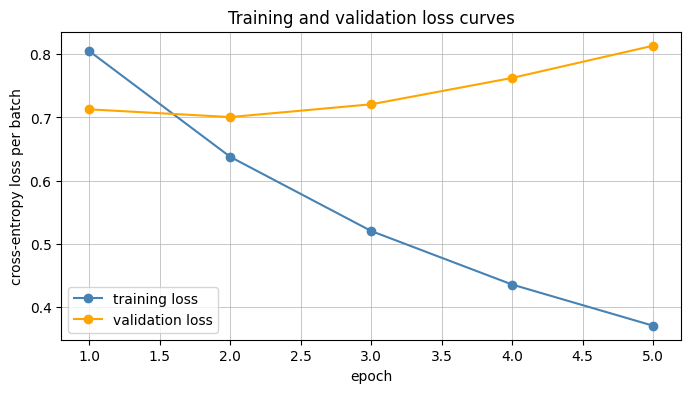

In [3]:
model = BERTModel("HateBERT")
model.train(X_train[:30], y_train[:30], X_val[:10], y_val[:10], epochs=10, patience=3, plot_training_curve=True)

########################################

Metrics for training
accuracy: 0.8333
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################

Metrics for validation
accuracy: 0.6000
balanced accuracy: 0.5000
precision: 0.0000
recall: 0.0000

########################################



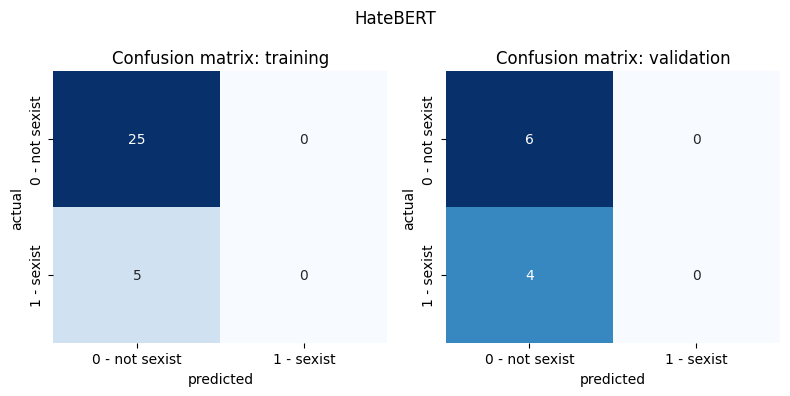

In [4]:
res = model.evaluate({"training": X_train[:30], "validation": X_val[:10]}, [y_train[:30], y_val[:10]], model_name=model.model_name)

# Autoregressive models: LLAMA